<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid19_casos_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados da COVID-19 no Brasil**

In [12]:
import pandas as pd

In [115]:
#Importando o dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

casos_globais = pd.read_csv(url)

In [116]:
#Mostrando o dataframe
casos_globais.head

<bound method NDFrame.head of     Province/State      Country/Region        Lat  ...  3/25/21  3/26/21  3/27/21
0              NaN         Afghanistan  33.939110  ...    56226    56254    56290
1              NaN             Albania  41.153300  ...   122767   123216   123641
2              NaN             Algeria  28.033900  ...   116543   116657   116750
3              NaN             Andorra  42.506300  ...    11687    11732    11809
4              NaN              Angola -11.202700  ...    21914    21961    22031
..             ...                 ...        ...  ...      ...      ...      ...
269            NaN             Vietnam  14.058324  ...     2579     2586     2586
270            NaN  West Bank and Gaza  31.952200  ...   232038   233549   234748
271            NaN               Yemen  15.552727  ...     3816     3900     3969
272            NaN              Zambia -13.133897  ...    87318    87583    87583
273            NaN            Zimbabwe -19.015438  ...    36778    3

In [117]:
#Mostrando os tipos das colunas do dataframe
casos_globais.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/23/21             int64
3/24/21             int64
3/25/21             int64
3/26/21             int64
3/27/21             int64
Length: 435, dtype: object

In [118]:
#Eliminando as colunas de latitude e longitude
casos_globais = casos_globais.drop(['Lat', 'Long'], axis=1)

In [119]:
#Mostrando o dataframe sem latitude e longitude
casos_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031


In [120]:
#Eliminando a divisão por provincias de países do dataframe
casos_globais = casos_globais.groupby('Country/Region').sum()

In [37]:
casos_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031


In [76]:
#Criando um dataframe apenas com as imformações do Brasil
casos_brasil = casos_globais.loc['Brazil']

In [77]:
casos_brasil.head

<bound method NDFrame.head of 1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
3/23/21    12130019
3/24/21    12220011
3/25/21    12320169
3/26/21    12404414
3/27/21    12490362
Name: Brazil, Length: 431, dtype: int64>

In [80]:
#Comprimindo o dataframe para conter apenas as informações de 10 em 10 dias
casos_brasil = casos_brasil.loc[::10]

In [84]:
#Eliminando os dias em que ainda não haviam casos confirmados nos Brasil
casos_brasil = casos_brasil[casos_brasil>0]

In [134]:
#Aribuindo a listas separadas as informações de data(data) e numeros de casos confirmados por data(casos) 
data = casos_brasil.index
casos = casos_brasil.values

In [135]:
#A lista 'data' recebeu os valores de index do dataframe 'casos_brasil'
data

Index(['3/2/20', '3/12/20', '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       '5/1/20', '5/11/20', '5/21/20', '5/31/20', '6/10/20', '6/20/20',
       '6/30/20', '7/10/20', '7/20/20', '7/30/20', '8/9/20', '8/19/20',
       '8/29/20', '9/8/20', '9/18/20', '9/28/20', '10/8/20', '10/18/20',
       '10/28/20', '11/7/20', '11/17/20', '11/27/20', '12/7/20', '12/17/20',
       '12/27/20', '1/6/21', '1/16/21', '1/26/21', '2/5/21', '2/15/21',
       '2/25/21', '3/7/21', '3/17/21', '3/27/21'],
      dtype='object')

In [87]:
#A lista 'casos' recebeu os valores contidos no dataframe 'casos_brasil'
casos

array([       2,       52,     1546,     6836,    20727,    43079,
          92202,   169594,   310087,   514849,   772416,  1067579,
        1402041,  1800827,  2118646,  2610102,  3035422,  3456652,
        3846153,  4162073,  4495183,  4745464,  5028444,  5224362,
        5468270,  5653561,  5911758,  6238350,  6623911,  7110434,
        7484285,  7873830,  8455059,  8933356,  9447165,  9866710,
       10390461, 11019344, 11693838, 12490362])

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


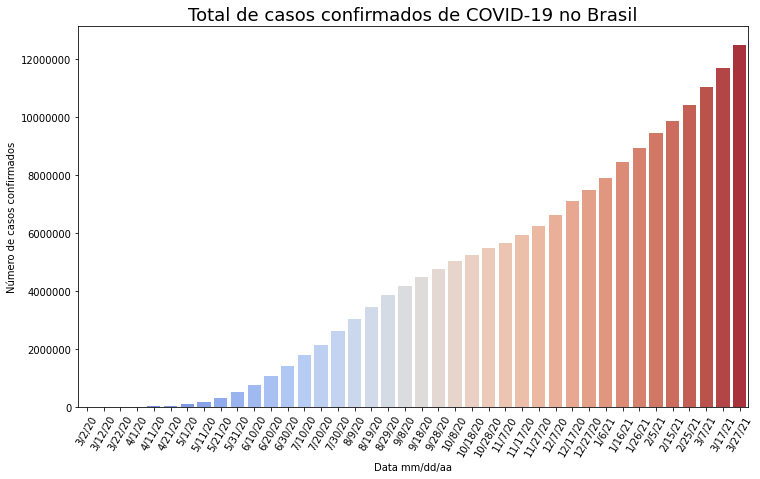

In [163]:
#Plotando um gráfico do total de casos confirmados no Brasil
plt.figure(figsize = (12,7))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Total de casos confirmados de COVID-19 no Brasil', fontsize = 18)
plt.xlabel('Data mm/dd/aa')
plt.ylabel('Número de casos confirmados')
sns.barplot(data,casos, palette = 'coolwarm')